In [7]:
import cv2
from modul.pipe_landmark import draw_landmarks_on_image, safe_imshow

I0000 00:00:1754989184.734773    4636 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1754989184.751691   19794 gl_context.cc:369] GL version: 3.1 (OpenGL ES 3.1 Mesa 23.2.1-1ubuntu3.1~22.04.3), renderer: D3D12 (NVIDIA GeForce RTX 3060 Ti)
W0000 00:00:1754989184.793763   19795 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1754989184.974978   19804 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


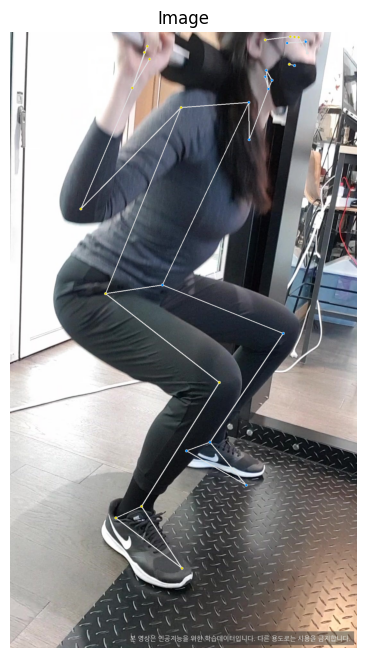

In [90]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# STEP 2: Create an PoseLandmarker object.
base_options = python.BaseOptions(model_asset_path='pose_landmarker.task')
options = vision.PoseLandmarkerOptions(
    base_options=base_options,
    output_segmentation_masks=True)
detector = vision.PoseLandmarker.create_from_options(options)

# STEP 3: Load the input image.
image_path = "squat.jpg"
image = mp.Image.create_from_file(image_path)

# STEP 4: Detect pose landmarks from the input image.
detection_result = detector.detect(image)

# STEP 5: Process the detection result. In this case, visualize it.
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
safe_imshow(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))

In [ ]:
# ✅ detection_result로 결과 확인
print(f"감지된 포즈 개수: {len(detection_result.pose_landmarks)}")

# 랜드마크 접근
if detection_result.pose_landmarks:
    for idx, pose_landmarks in enumerate(detection_result.pose_landmarks):
        print(f"포즈 {idx+1}:")
        for i, landmark in enumerate(pose_landmarks):
            print(f"  관절 {i}: x={landmark.x:.3f}, y={landmark.y:.3f}")

감지된 포즈 개수: 1
포즈 1:
  관절 0: x=0.857, y=0.034
  관절 1: x=0.852, y=0.014
  관절 2: x=0.852, y=0.015
  관절 3: x=0.852, y=0.016
  관절 4: x=0.832, y=0.009
  관절 5: x=0.820, y=0.008
  관절 6: x=0.808, y=0.008
  관절 7: x=0.799, y=0.018
  관절 8: x=0.736, y=0.013
  관절 9: x=0.820, y=0.055
  관절 10: x=0.805, y=0.052
  관절 11: x=0.688, y=0.114
  관절 12: x=0.493, y=0.122
  관절 13: x=0.689, y=0.175
  관절 14: x=0.204, y=0.287
  관절 15: x=0.745, y=0.093
  관절 16: x=0.352, y=0.091
  관절 17: x=0.755, y=0.079
  관절 18: x=0.387, y=0.033
  관절 19: x=0.738, y=0.062
  관절 20: x=0.395, y=0.023
  관절 21: x=0.735, y=0.072
  관절 22: x=0.403, y=0.044
  관절 23: x=0.440, y=0.411
  관절 24: x=0.275, y=0.425
  관절 25: x=0.788, y=0.489
  관절 26: x=0.604, y=0.569
  관절 27: x=0.576, y=0.666
  관절 28: x=0.379, y=0.770
  관절 29: x=0.509, y=0.680
  관절 30: x=0.305, y=0.789
  관절 31: x=0.681, y=0.736
  관절 32: x=0.496, y=0.870


In [18]:
landmark_names_ko = [
    "코",                     # 0
    "왼쪽 눈 안쪽",              # 1
    "왼쪽 눈",                 # 2
    "왼쪽 눈 바깥쪽",            # 3
    "오른쪽 눈 안쪽",            # 4
    "오른쪽 눈",               # 5
    "오른쪽 눈 바깥쪽",          # 6
    "왼쪽 귀",                 # 7
    "오른쪽 귀",               # 8
    "입 왼쪽",                 # 9
    "입 오른쪽",               # 10
    "왼쪽 어깨",               # 11
    "오른쪽 어깨",             # 12
    "왼쪽 팔꿈치",             # 13
    "오른쪽 팔꿈치",           # 14
    "왼쪽 손목",               # 15
    "오른쪽 손목",             # 16
    "왼쪽 새끼손가락",          # 17
    "오른쪽 새끼손가락",        # 18
    "왼쪽 검지",               # 19
    "오른쪽 검지",             # 20
    "왼쪽 엄지",               # 21
    "오른쪽 엄지",             # 22
    "왼쪽 엉덩이",             # 23
    "오른쪽 엉덩이",           # 24
    "왼쪽 무릎",               # 25
    "오른쪽 무릎",             # 26
    "왼쪽 발목",               # 27
    "오른쪽 발목",             # 28
    "왼쪽 발뒤꿈치",           # 29
    "오른쪽 발뒤꿈치",         # 30
    "왼쪽 발가락",             # 31
    "오른쪽 발가락"            # 32
]

In [99]:
pose_rocation_dict = {}

for i, pose_landmarks in enumerate(detection_result.pose_landmarks) :
    for part, landmark in zip(landmark_names_ko, pose_landmarks) :
        # pose_rocation = [part, landmark.x, landmark.y, landmark.z, landmark.visibility, landmark.presence]
        idx = {'file_name' : image_path}
        pose_rocation = { part : [{
                        'x' : landmark.x, 
                        'y' : landmark.y, 
                        'z' : landmark.z, 
                        'visibility' : landmark.visibility,
                        'presence' : landmark.presence}]}
        pose_rocation_dict = pose_rocation_dict | pose_rocation

    pose_data = idx | pose_rocation_dict

In [ ]:
pd.DataFrame(columns= ['file_name'] + landmark_names_ko, data = pose_data).set_index('file_name')

,코,왼쪽 눈 안쪽,왼쪽 눈,왼쪽 눈 바깥쪽,오른쪽 눈 안쪽,오른쪽 눈,오른쪽 눈 바깥쪽,왼쪽 귀,오른쪽 귀,입 왼쪽,...,왼쪽 엉덩이,오른쪽 엉덩이,왼쪽 무릎,오른쪽 무릎,왼쪽 발목,오른쪽 발목,왼쪽 발뒤꿈치,오른쪽 발뒤꿈치,왼쪽 발가락,오른쪽 발가락
file_name,,,,,,,,,,,,,,,,,,,,,
squat.jpg,"{'x': 0.8571220636367798, 'y': 0.0338679850101...","{'x': 0.851993203163147, 'y': 0.01379719376564...","{'x': 0.8518233895301819, 'y': 0.0148134529590...","{'x': 0.8520106077194214, 'y': 0.0156525671482...","{'x': 0.831792950630188, 'y': 0.00876048207283...","{'x': 0.8197636604309082, 'y': 0.0081099271774...","{'x': 0.8075768947601318, 'y': 0.0077523589134...","{'x': 0.7987831830978394, 'y': 0.0180120766162...","{'x': 0.7359570264816284, 'y': 0.0128078758716...","{'x': 0.8201761245727539, 'y': 0.0546422898769...",...,"{'x': 0.4396204352378845, 'y': 0.4107147753238...","{'x': 0.27548980712890625, 'y': 0.424619108438...","{'x': 0.7876433730125427, 'y': 0.4893761873245...","{'x': 0.6036906242370605, 'y': 0.5691238641738...","{'x': 0.5760680437088013, 'y': 0.6660850644111...","{'x': 0.37933385372161865, 'y': 0.769888520240...","{'x': 0.5090235471725464, 'y': 0.6802008748054...","{'x': 0.30469340085983276, 'y': 0.788980603218...","{'x': 0.6812854409217834, 'y': 0.7357826232910...","{'x': 0.49614572525024414, 'y': 0.870450258255..."
